In [181]:
import numpy as np
import pandas as pd

In [182]:
df = pd.read_csv("spam.csv")

In [183]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [184]:
df.shape

(5572, 5)

In [185]:
# steps -
# Data cleaning
# EDA
# Text preperocessing
# Model building
# Evaluation
# Improvements depending on evaluation
# Convert it into website by deploying

In [186]:
# Data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [187]:
#Drop last 3 columns
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [188]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [189]:
df.rename(columns = {"v1" : "Target", "v2" : "Message"}, inplace=True)

In [190]:
df.sample(5)

,Target,Message
4050,ham,"Motivate Behind every darkness, there is a shi..."
2750,ham,Ok but tell me half an hr b4 u come i need 2 p...
4429,ham,Yar lor... How u noe? U used dat route too?
87,ham,Yes I started to send requests to make it but ...
3930,ham,Nooooooo I'm gonna be bored to death all day. ...


In [191]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [192]:
df["Target"] = encoder.fit_transform(df["Target"])

In [193]:
#ham -> 0, spam -> 1

In [ ]:
df.head()

In [ ]:
df.isnull().sum() #checking for missing values

In [ ]:
df.duplicated().sum() #checking for duplicate values

403

In [ ]:
df.drop_duplicates(keep = "first", inplace=True)

In [198]:
df.shape

(5169, 2)

In [199]:
# EDA, always perform EDA before ML

In [200]:
df["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [201]:
import matplotlib.pyplot as plt

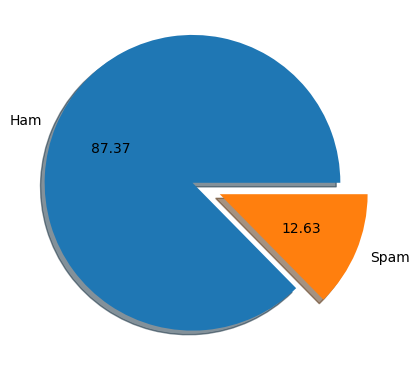

In [202]:
plt.pie(df["Target"].value_counts(), labels = ["Ham", "Spam"], explode = [0.2, 0], shadow = True, autopct = "%0.2f")
plt.show()

In [203]:
# Data is imbalanced, ham is much more than spam

In [204]:
pip install nltk

In [205]:
import nltk

In [206]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Arnab
[nltk_data]     Sadhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [207]:
df["num_characters"] = df["Message"].apply(len)  #finding the number of characters used in the sms

In [208]:
df.head()

,Target,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [209]:
#findding number of words used in the sms

df["num_words"] = df["Message"].apply(lambda x:len(nltk.word_tokenize(x)))

In [210]:
df.head()

,Target,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [211]:
df["num_sent"] = df["Message"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [212]:
df.head()

,Target,Message,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [213]:
df[["num_characters", "num_words", "num_sent"]].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [214]:
#Ham messages
df[df["Target"] == 0][["num_characters", "num_words", "num_sent"]].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [215]:
#spam messages
df[df["Target"] == 1][["num_characters", "num_words", "num_sent"]].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [216]:
# We can see that on an average spam messages are longer, have more characters and words or scentences, let's plot histogram

In [217]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

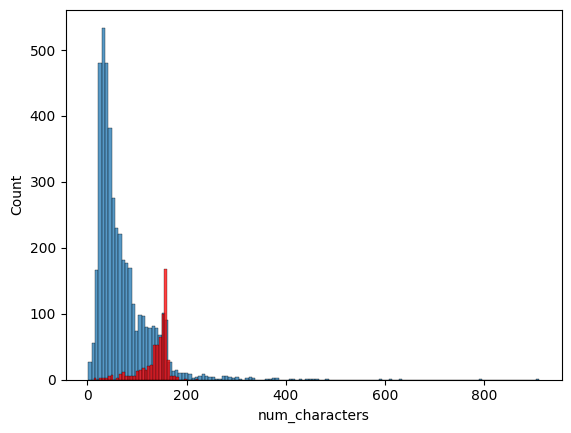

In [218]:
sns.histplot(df[df["Target"] == 0]["num_characters"])
sns.histplot(df[df["Target"] == 1]["num_characters"], color = "red")

In [219]:
df[["Target", "num_characters", "num_words", "num_sent"]].corr()

,Target,num_characters,num_words,num_sent
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


<Axes: >

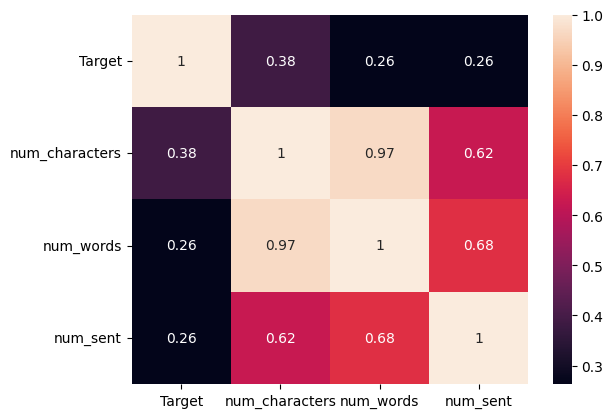

In [220]:
sns.heatmap(df[["Target", "num_characters", "num_words", "num_sent"]].corr(), annot = True)

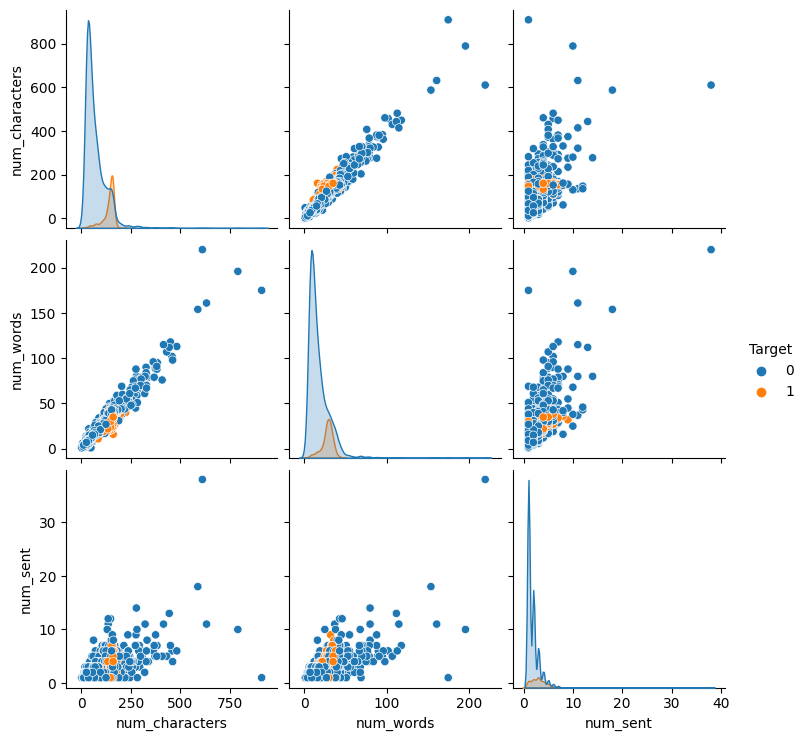

In [221]:
sns.pairplot(df, hue = "Target")

In [222]:
#There are outliers in the dataset, which can hamper the analysis

In [223]:
#we use num_characters for model building as it has a coeff of rel. of 0.38 with target(higher compared to other two parameters.)

In [224]:
#Data(textual data here) preprocessing

# 1) convert all to lowercase
# 2) tokenize(break into words)
# 3) removing stop words and punctuation
# 4) removing speacial characters(only keep alphabetic and alphanumeric data)
# 5) stemming

In [225]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Arnab
[nltk_data]     Sadhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [226]:
#for removing stop words
from nltk.corpus import stopwords

In [227]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [228]:
import string

In [229]:
#Punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [230]:
#for stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("learned")

'learn'

In [231]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    for word in text:
        if word.isalnum() == False:
            text.remove(word)
            
    for word in text:
        if word in stopwords.words('english') or word in string.punctuation:
            text.remove(word)
    
    y = []
    for word in text:
        y.append(ps.stem(word))
    text = y[:]
    y.clear()
    text = " ".join(text)
    return text

In [232]:
print(transform_text(df["Message"][1000]))

but heard abt tat


In [233]:
df["Message"][1000]

'No..but heard abt tat..'

In [234]:
bbbbb = "I loved the lectures on Machine Learning, how about you?"

In [235]:
transform_text(bbbbb)

'love lectur machin learn about'

In [236]:
df["Transformed_message"] = df["Message"].apply(transform_text)

In [237]:
df.head()

,Target,Message,num_characters,num_words,num_sent,Transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail in bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah do think goe usf live around though


In [238]:
#generating word cloud, enlraged or highlights important words of spam and ham messages

In [239]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [240]:
from wordcloud import WordCloud

In [241]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10)

In [242]:
spam_wc = wc.generate(df[df["Target"] == 1]["Transformed_message"].str.cat(sep=" "))

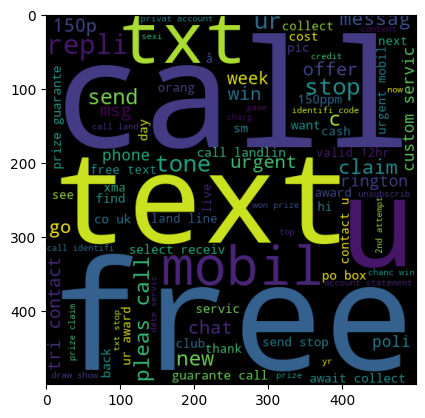

In [243]:
plt.imshow(spam_wc)

In [244]:
ham_wc = wc.generate(df[df['Target'] == 0]["Transformed_message"].str.cat(sep = " "))

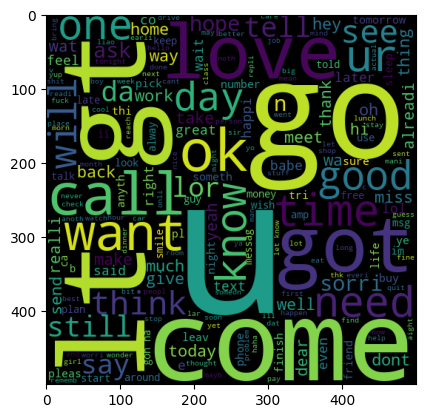

In [245]:
plt.imshow(ham_wc)

In [246]:
#Lets find top 30 words used in both ham and spam messages

In [247]:
spam_corpus = []
for msg in df[df["Target"] == 1]["Transformed_message"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [248]:
len(spam_corpus)

11330

In [249]:
from collections import Counter
top_30_spam = Counter(spam_corpus).most_common(30)
print(top_30_spam)

[('call', 320), ('free', 191), ('2', 155), ('a', 154), ('txt', 141), ('text', 122), ('u', 119), ('ur', 119), ('mobil', 114), ('stop', 104), ('repli', 103), ('claim', 98), ('4', 97), ('your', 91), ('you', 89), ('prize', 82), ('get', 74), ('the', 70), ('have', 65), ('new', 64), ('servic', 64), ('tone', 63), ('send', 60), ('urgent', 57), ('nokia', 57), ('contact', 56), ('award', 55), ('is', 52), ('phone', 52), ('cash', 51)]


In [250]:
ham_corpus = []
for msg in df[df["Target"] == 0]["Transformed_message"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [251]:
top_30_ham = Counter(ham_corpus).most_common(30)
print(top_30_ham)

[('u', 883), ('i', 680), ('you', 640), ('the', 507), ('a', 416), ('go', 404), ('get', 349), ('gt', 288), ('lt', 287), ('2', 284), ('come', 275), ('got', 236), ('know', 236), ('to', 235), ('like', 234), ('call', 233), ('do', 224), ('time', 219), ('ok', 217), ('love', 216), ('my', 216), ('good', 213), ('want', 208), ('have', 205), ('it', 205), ('are', 199), ('ur', 197), ('day', 190), ('that', 179), ('in', 178)]


In [252]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [253]:
#Model building using Naive Bayes algorith(as it works best with textual data)

In [254]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df["Transformed_message"]).toarray()
X   #A sparse array of dimension 2 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [255]:
X.shape

(5169, 6942)

In [256]:
y = df["Target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [257]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)

In [258]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [259]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
gnb.fit(train_X, train_y)
bnb.fit(train_X, train_y)
mnb.fit(train_X, train_y)

MultinomialNB()

In [260]:
#Now evaluate all the 3 models to find which one gives the best result
y_pred_1 = gnb.predict(test_X)

In [261]:
print(accuracy_score(y_pred_1, test_y))
print(confusion_matrix(y_pred_1, test_y))
print(precision_score(y_pred_1, test_y))

0.8897485493230174
[[799  17]
 [ 97 121]]
0.8768115942028986


In [262]:
y_pred_2 = bnb.predict(test_X)

In [263]:
print(accuracy_score(y_pred_2, test_y))
print(confusion_matrix(y_pred_2, test_y))
print(precision_score(y_pred_2, test_y))

0.971953578336557
[[893  26]
 [  3 112]]
0.8115942028985508


In [264]:
y_pred_3 = mnb.predict(test_X)

In [265]:
print(accuracy_score(y_pred_3, test_y))
print(confusion_matrix(y_pred_3, test_y))
print(precision_score(y_pred_3, test_y))

0.9690522243713733
[[875  11]
 [ 21 127]]
0.9202898550724637


In [266]:
#logistic reg
logr = LogisticRegression()
logr.fit(train_X, train_y)

LogisticRegression()

In [267]:
pred_val_4 = logr.predict(test_X)

In [268]:
print(accuracy_score(pred_val_4, test_y))
print(precision_score(pred_val_4, test_y))
print(confusion_matrix(pred_val_4, test_y))

0.9777562862669246
0.8405797101449275
[[895  22]
 [  1 116]]


# Making the above process less clunky 

In [270]:
classifiers = [bnb, mnb, gnb, logr]

In [271]:
def train_classifier(classi, train_X, test_X, train_y, test_y):
    classi.fit(train_X, train_y)
    predict_val = classi.predict(test_X)
    accuracy_model = accuracy_score(predict_val, test_y)
    precision_model = precision_score(predict_val, test_y)
    return accuracy_model, precision_model

In [278]:
evaluation = [[model_name, train_classifier(model_name, train_X, test_X, train_y, test_y)] for model_name in classifiers]
evaluation

[[BernoulliNB(), (0.971953578336557, 0.8115942028985508)],
 [MultinomialNB(), (0.9690522243713733, 0.9202898550724637)],
 [GaussianNB(), (0.8897485493230174, 0.8768115942028986)],
 [LogisticRegression(), (0.9777562862669246, 0.8405797101449275)]]

In [279]:
#Multinomial Naive Bayes provides the best precision score, so we're chosing this model

In [287]:
import pickle
pickle.dump(cv, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))